In [1]:
from QHyper.problems.community_detection import (
    BrainNetwork,
    CommunityDetectionProblem,
    KarateClubNetwork,
)
from QHyper.problems.network_communities.utils import (
    draw_communities_from_graph,
    write_to_file,
)
from QHyper.solvers.gurobi.gurobi import Gurobi
import networkx.algorithms.community as nx_comm

<class 'networkx.utils.decorators.argmap'> compilation 5:5: FutureWarning: modularity_matrix will return a numpy array instead of a matrix in NetworkX 3.0.


In [8]:
path = "../QHyper/problems/network_communities/brain_community_data"
data_name = "Edge_AAL90_Binary"

In [3]:
name = "brain"
folder = "demo/demo_output"
solution_file = f"{folder}/{name}_gurobi_solution.csv"
decoded_solution_file = f"{folder}/{name}_gurobi_decoded_solution.csv"
img_solution_path = f"{folder}/{name}_gurobi.png"

In [9]:
brain_network = BrainNetwork(input_data_dir=path, input_data_name=data_name)
brain_problem = CommunityDetectionProblem(brain_network, N_communities=4)
problem = brain_problem

<class 'networkx.utils.decorators.argmap'> compilation 5:5: FutureWarning: modularity_matrix will return a numpy array instead of a matrix in NetworkX 3.0.


In [10]:
gurobi = Gurobi(problem=problem)
solution = gurobi.solve({})
decoded_solution = problem.decode_dummies_solution(solution)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-07-16
Set parameter MIPGap to value 0.1
-1.0 + s0 + s1 + s2 + s3
-1.0 + s4 + s5 + s6 + s7
-1.0 + s10 + s11 + s8 + s9
-1.0 + s12 + s13 + s14 + s15
-1.0 + s16 + s17 + s18 + s19
-1.0 + s20 + s21 + s22 + s23
-1.0 + s24 + s25 + s26 + s27
-1.0 + s28 + s29 + s30 + s31
-1.0 + s32 + s33 + s34 + s35
-1.0 + s36 + s37 + s38 + s39
-1.0 + s40 + s41 + s42 + s43
-1.0 + s44 + s45 + s46 + s47
-1.0 + s48 + s49 + s50 + s51
-1.0 + s52 + s53 + s54 + s55
-1.0 + s56 + s57 + s58 + s59
-1.0 + s60 + s61 + s62 + s63
-1.0 + s64 + s65 + s66 + s67
-1.0 + s68 + s69 + s70 + s71
-1.0 + s72 + s73 + s74 + s75
-1.0 + s76 + s77 + s78 + s79
-1.0 + s80 + s81 + s82 + s83
-1.0 + s84 + s85 + s86 + s87
-1.0 + s88 + s89 + s90 + s91
-1.0 + s92 + s93 + s94 + s95
-1.0 + s96 + s97 + s98 + s99
-1.0 + s100 + s101 + s102 + s103
-1.0 + s104 + s105 + s106 + s107
-1.0 + s108 + s109 + s110 + s111
-1.0 + s112 + s113 + s114 + s115
-1.0 + s116 + s117 + s118 + 

In [21]:
sample = decoded_solution
communities = []
for k in range(problem.N_cases):
    comm = []
    for i in sample:
        if sample[i] == k:
            comm.append(i)
    communities.append(set(comm))

print(communities)

[{34, 35, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 58, 59, 66, 67}, {0, 1, 16, 17, 19, 28, 29, 32, 33, 56, 57, 62, 63, 68, 69, 78, 79, 80, 81, 82, 83}, {2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 22, 23, 24, 25, 26, 27, 30, 31, 60, 61, 64, 65, 84, 85, 88, 89}, {36, 37, 38, 39, 40, 41, 70, 71, 72, 73, 74, 75, 76, 77, 20, 21, 86, 87}]


In [22]:
nx_comm.modularity(problem.G, communities=communities)

0.6424778446729537

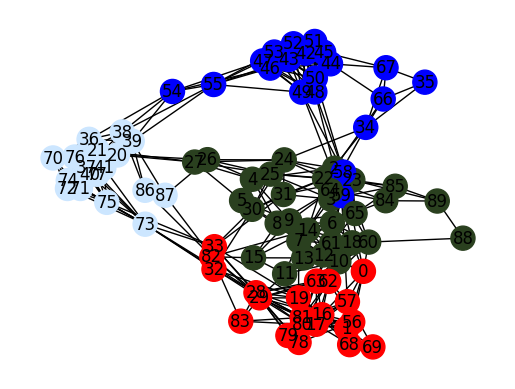

In [25]:
from matplotlib import pyplot as plt
import networkx as nx
from QHyper.problems.network_communities.utils import COLORS


color_map = []
for node in problem.G:
    color_map.append(COLORS[sample[node]])

f = plt.figure()
nx.draw(
    problem.G,
    node_color=color_map,
    with_labels=True,
    ax=f.add_subplot(111),
)

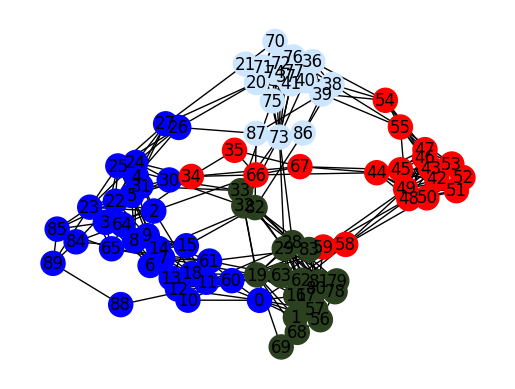

In [30]:
from QHyper.problems.network_communities.utils import ResultsFrame


lcda_communities = nx_comm.louvain_communities(
    problem.G, seed=5345, resolution=0.5
)  # seed=None

lcda_sample_like = ResultsFrame().louvain_communities_to_sample_like(lcda_communities)
sample = lcda_sample_like

color_map = []
for node in problem.G:
    color_map.append(COLORS[sample[node]])

f = plt.figure()
nx.draw(
    problem.G,
    node_color=color_map,
    with_labels=True,
    ax=f.add_subplot(111),
)

In [31]:
nx_comm.modularity(problem.G, communities=lcda_communities)

0.6411192214111923